In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from textblob import TextBlob

In [3]:
dff=pd.read_csv("superstore_sales.csv")

In [4]:
dff.shape

(51290, 21)

In [5]:
dff.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

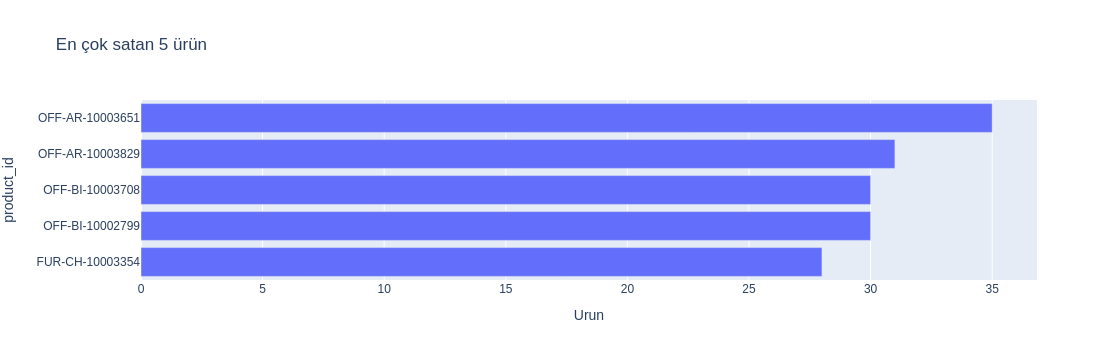

KeyError: "None of [Index(['OFF-TEN-10000025', 'OFF-SU-10000618', 'OFF-TEN-10001585',\n       'OFF-PA-10001492', 'FUR-FU-10003447', 'OFF-PA-10001968',\n       'TEC-OKI-10002750', 'OFF-AP-10000304', 'TEC-CO-10004182',\n       'FUR-NOV-10002791',\n       ...\n       'OFF-HAR-10001531', 'OFF-BI-10004632', 'OFF-AVE-10003558',\n       'OFF-PA-10004727', 'OFF-LA-10004969', 'OFF-BI-10002103',\n       'OFF-WIL-10001069', 'OFF-LA-10004182', 'OFF-LA-10000413',\n       'OFF-FA-10003472'],\n      dtype='object', length=51290)] are in the [index]"

In [28]:
dff['product_id']=dff['product_id'].fillna('Urun bilgisi bulunamadı')
filtered_product=pd.DataFrame()
filtered_product=dff['product_id'].str.split(',', expand=True).stack()
filtered_product=filtered_product.to_frame()
filtered_product.columns=['product_id']
product=filtered_product.groupby(['product_id']).size().reset_index(name='Urun')
product= product[product.product_id != 'Urun bilgisi bulunamadı']
product=product.sort_values(by=['Urun'],ascending=False)
productTop5=product.head()
productTop5=productTop5.sort_values(by=['Urun'])
fig1=px.bar(productTop5,x='Urun',y='product_id',title='En çok satan 5 ürün')
fig1.show()

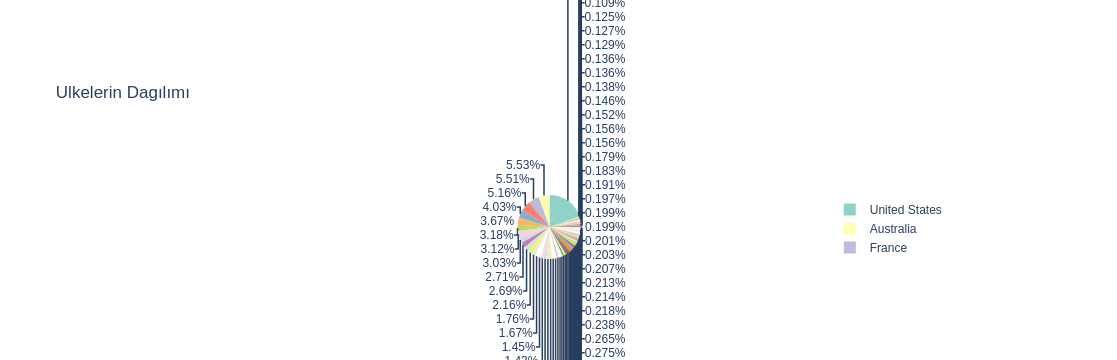

In [13]:
z = dff.groupby(["country"]).size().reset_index(name="counts")
pieChart =  px.pie(z, values='counts', names='country', 
                  title='Ulkelerin satis dagılımı',
                  color_discrete_sequence = px.colors.qualitative.Set3
                  )
pieChart.show()

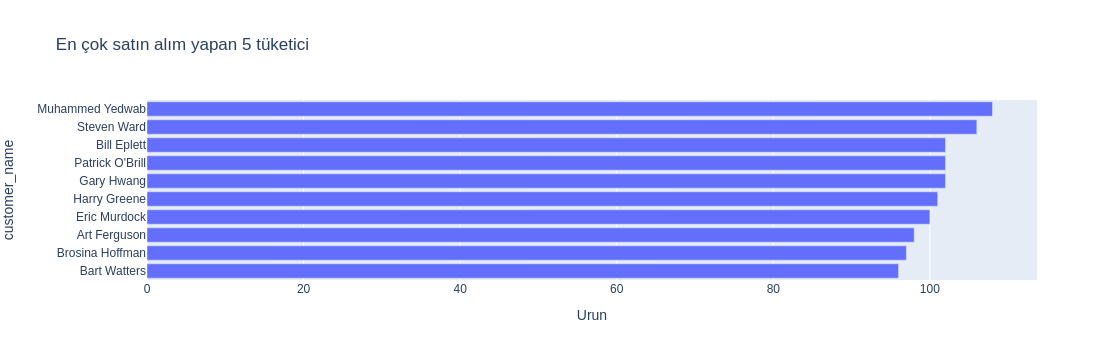

In [24]:
dff['customer_name']=dff['customer_name'].fillna('Tuketici bilgisi bulunamadı')
filtered_customer=pd.DataFrame()
filtered_customer=dff['customer_name'].str.split(',', expand=True).stack()
filtered_customer=filtered_customer.to_frame()
filtered_customer.columns=['customer_name']
customer=filtered_customer.groupby(['customer_name']).size().reset_index(name='Urun')
customer= customer[customer.customer_name != 'Tuketici bilgisi bulunamadı']
customer=customer.sort_values(by=['Urun'],ascending=False)
customerTop5=customer.head(10)
customerTop5=customerTop5.sort_values(by=['Urun'])
fig2=px.bar(customerTop5,x='Urun',y='customer_name',title='En çok satın alım yapan 5 tüketici')
fig2.show()